# Viscosity Interpolation

Some tests, examples of viscosity interpolation

As a rule, visoscity varies exponentially with temperature, so that's how we onterpolatie it

But something seemed wrong with some dat from LSFOs

Here's a check, using the KinematicViscosity Object from adios_db.computation

## Conclusion so far:

The fit to an exponential works well for crude oils -- which is what we determined way back when.

However -- it works really poorly for at least some ULSFOs -- maybe other distilled products as well.

## Solution?

First step is to check the residuals, and at least issue a warning.

Next step is to come up with a better interolatio method -- we could do piecwise (linear or exponential), but thatmight extrapolate really badly. That may not be SO bad for environmental conditions -- not a huge temp range --  but not great for labeling and the like.

I tried using only the outside two pooints -- not good.

Could a 3 parameter exponential fit work? IN theory, it should't -- viscosity should tend to zero at infinite temperature, but maybe it wold work OK locally -- at least it would exactly fit three points :-)

Hmm -- piecewise exponential, with the extrapolation using a the fit to the end points?




In [22]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot  as plt
import adios_db.scripting as ads
import adios_db.computation.physical_properties as pp

In [26]:
# Here's an LSFO with dynamic viscosity data:
EXAMPLE_DATA_DIR = Path("../adios_db/test") / "data_for_testing" / "example_data"

oils = [ads.Oil.from_file(datafile) for datafile in
            (EXAMPLE_DATA_DIR / 'record_with_only_dynamic_viscosity.json',
             EXAMPLE_DATA_DIR / 'ExampleFullRecord.json',
             EXAMPLE_DATA_DIR / 'hoops-blend_EX00026.json',
            )
       ]

# oil = oils[0]


ULSFO Rotterdam Diesel (SINTEF)
Access West Blend Winter
HOOPS Blend


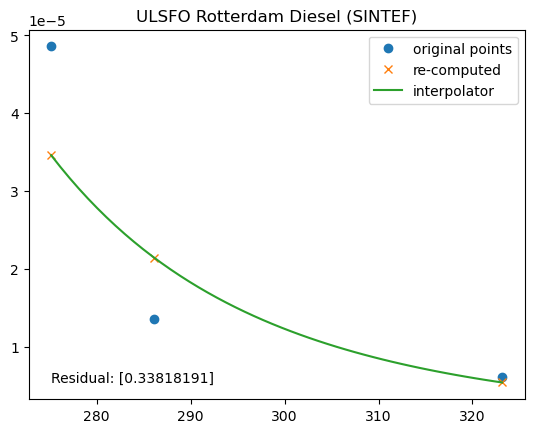

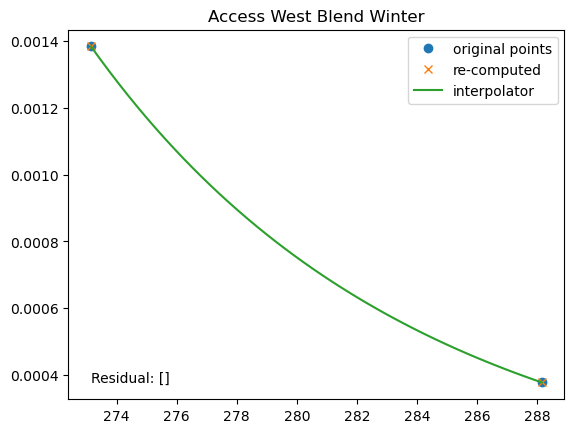

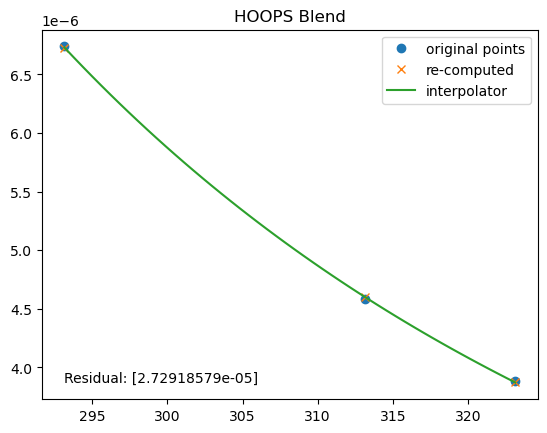

In [27]:
for oil in oils:
    oil_name = oil.metadata.name
    print(oil_name)
    KV = pp.KinematicViscosity(oil)
    visc = KV.kviscs
    temps = KV.temps
    visc2 = KV.at_temp(temps)

    temps3 = np.linspace(min(temps), max(temps))
    visc3 = KV.at_temp(temps3)
    fig, ax = plt.subplots()
    ax.set_title(oil_name)
    ax.plot(temps, visc, 'o')
    ax.plot(temps, visc2, 'x')
    ax.plot(temps3, visc3)
    ax.legend(["original points", "re-computed", "interpolator"])
    ax.text(min(temps3),min(visc3) , f"Residual: {KV.residuals}")


## What if we only ue the outer points?

In [28]:
datafile = EXAMPLE_DATA_DIR / 'record_with_only_dynamic_viscosity.json'
oil = ads.Oil.from_file(datafile)

ULSFO Rotterdam Diesel (SINTEF)


Text(275.15, 6.10188796933694e-06, 'Residual: []')

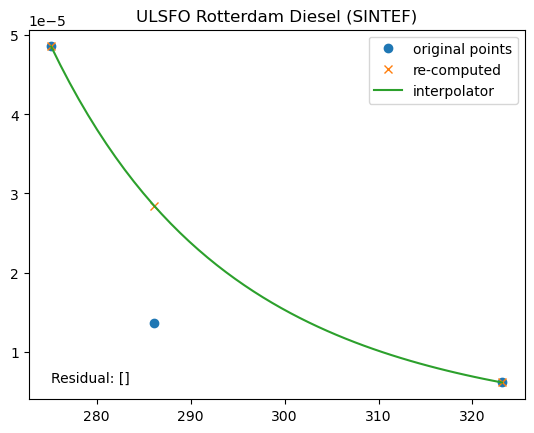

In [35]:

oil_name = oil.metadata.name
print(oil_name)
KV = pp.KinematicViscosity(oil)

# get the original points
visc = KV.kviscs
temps = KV.temps

# keep only the end two values
KV.kviscs = (KV.kviscs[0], KV.kviscs[-1])
KV.temps = (KV.temps[0], KV.temps[-1])
# re-initialize
KV.initialize()

visc2 = KV.at_temp(temps)

temps3 = np.linspace(min(temps), max(temps))
visc3 = KV.at_temp(temps3)
fig, ax = plt.subplots()
ax.set_title(oil_name)
ax.plot(temps, visc, 'o')
ax.plot(temps, visc2, 'x')
ax.plot(temps3, visc3)
ax.legend(["original points", "re-computed", "interpolator"])
ax.text(min(temps3),min(visc3) , f"Residual: {KV.residuals}")

